## Небольшой срез знаний

### Блиц опрос
1. Как выглядит модель линейной и логистической регрессии в матричном виде
1. Как обучается модель линейной регрессии
1. Как обучается модель логистияеской регрессии
1. Если корреляция между таргетом и признаком равна нулю, можно ли сделать вывод, что таргет не зависит от признака
1. Если модель дерева показала идеальные метрики качества на тестовой выборке, то можем ли мы утверждать, что модель обучилась?
1. Как обучается дерево, по каким принципам деляться узлы? 
1. Какие вы знаете критерии информативности?
1. Какие средства борьбы с переобучением вы знаете?

### Задача
Дан pandas.DataFrame. Необходимо сделать следующие манипуляции

1. Выбрать первую и последнюю колонку 
1. Выбрать первую и последнюю строку
1. Выбрать строку с индексом 'wer'
1. Выбрать строки у которых значение признака z равно 5
1. Сгруппировать данные по колонке z и посчитать среднее значение для каждой группы
1. Сделать новую колонку 'd' которая равна $x^2 + y$
1. Вывести гистограмму 'd'
1. Вывести scatterplot зависимости 'x' от 'y'
1. Записать полученный dataFrame в базу данных. Проверить, что данные действительно записались
1. Сделать запрос к бд в котором выбрать такие строки, в которых значение 'x' больше трех

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.DataFrame(
    {'x': range(1, 10, 2),
     'y': [1, 2, 3, 4, 5],
     'z': ['A', 'B', 'A', 'A', 'B']
    },
    index = ['qwe', 'wer', 'ert', 'rty', 'dfg']
)
df

x  y  z
qwe  1  1  A
wer  3  2  B
ert  5  3  A
rty  7  4  A
dfg  9  5  B

In [4]:
# ваш код здесь

# Ансамбли моделей

## Recap: bais - variance tradeoff 


Предположим, что мы решаем задачу регрессии с квадратичной функцией потерь. При использовании квадратичной функции потерь для оценки качества работы алгоритма $a$ можно использовать следующий функционал:

$$Q(a)=\mathbb{E}_{x} \mathbb{E}_{X, \varepsilon}[y(x, \varepsilon)-a(x, X)]^{2}$$

где

- $X$ – обучающая выборка
- $x$ – точка из тестового множества
- $y = f(x) + \varepsilon$ – целевая зависимость, которую мы можем измерить с точностью до случайного шума $\varepsilon$
- $a(x, X)$ – значение алгоритма, обученного на выборке $X$, в точке $x$
- $\mathbb{E}_{x}$ – среднее по всем тестовым точкам 
- $\mathbb{E}_{X, \varepsilon}$ – среднее по всем обучающим выборкам $X$ и случайному шуму $\varepsilon$


Для $Q(a)$ существует разложение на три компоненты – шум, смещение и разброс. Это разложение называется **bias-variance decomposition**, и оно является одним из мощных средств для анализа работы ансамблей.

**Bias-variance decomposition**. Существует представление $Q(a)$ в виде трёх компонент:

$$Q(a)=\mathbb{E}_{x} \operatorname{bias}_{X}^{2} a(x, X)+\mathbb{E}_{x} \mathbb{V} \operatorname{ar}_{X}[a(x, X)]+\sigma^{2}$$

где

$$\operatorname{bias}_{X} a(x, X)=f(x)-\mathbb{E}_{X}[a(x, X)]$$

– **смещение** предсказания алгоритма в точке $x$, усреднённого по всем возможным обучающим выборкам, относительно истинной зависимости $f$,

$$\mathbb{V} \operatorname{ar}_{X}[a(x, X)]=\mathbb{E}_{X}\left[a(x, X)-\mathbb{E}_{X}[a(x, X)]\right]^{2}$$

– **дисперсия (разброс)** предсказаний алгоритма в зависимости от обучающей выборки $X$,

$$\sigma^{2}=\mathbb{E}_{x} \mathbb{E}_{\varepsilon}[y(x, \varepsilon)-f(x)]^{2}$$

– неустранимый **шум** в данных.

Раз нам известно, что ошибка алгоритма раскладывается на шум, смещение и разброс, можно подумать над способом сократить ошибку. Будет разумно попытаться сначала уменьшить одну из составляющих. Понятно, что с шумом уже ничего не сделать – это минимально возможная ошибка. Какую можно придумать процедуру, чтобы, например, сократить разброс, не увеличивая смещение?

Пример приходит из жизни древних греков. Если много древних греков соберутся на одном холме и проголосуют независимо друг от друга, то вместе они придут к разумному решению несмотря на то, что опыт каждого из них субъективен.

## Есть несколько способов создания ансамблей:

- Бэггинг (Bagging, сокращение от Bootstrap Aggregation) - однородные модели (из одного класса) обучаются независимо друг от друга на разных случайных подвыборках и разных признаках. Итоговый прогноз считается при помощи голосования моделей. Пример: случайный лес
- Бустинг - однородные модели строятся последовательно, каждая следующая модель старается минимизировать ошибку предыдущей. Пример: градиентный бустинг
- Стекинг - разнородные модели обучаются на всех данных (или на подвыборках) и поверх них строится модель, которая минимизирует общую ошибку.

## Бэггинг

## Бэггинг
Идея **бэггинга** (**bagging**, **bootstrap aggregation**) заключается в следующем. Выберем из обучающей выборки $n$ примеров. Будем выбирать примеры равновероятно, с повторением. Получим новую выборку $X^1$, в которой некоторых элементов исходной выборки не будет, а какие-то могут войти несколько раз (примерно 2/3 значений войдут в новую выборку). С помощью некоторого алгоритма $b$ обучим на этой выборке модель $b_1(x) = b(x, X^1)$. Повторим процедуру: сформируем вторую выборку $X^2$ из $n$ элементов с возвращением и с помощью того же алгоритма обучим на ней модель $b_2(x) = b(x, X^2)$. Повторив процедуру $k$ раз, получим $k$ моделей, обученных на $k$ выборках. Чтобы получить одно предсказание, усредним предсказания всех моделей:

$$a(x)=\frac{1}{k}\left(b_{1}(x)+\cdots+b_{k}(x)\right)$$

Процесс генерации подвыборок с помощью семплирования с возвращением называется **бутстрепом** (**bootstrap**), а модели $b_1(x), \ldots, b_k(x)$ часто называют **базовыми алгоритмами** (хотя, наверное, лучше было бы назвать их базовыми моделями). Модель $a(x)$ называется ансамблем этих моделей.

При этом смещение (bias) ансамбля не изменяется. 

Дисперсия ансамбля равна 
$$\operatorname{Var}_{X}[a(x, X)] = \frac{1}{k^{2}} \sum_{i=1}^{k} \operatorname{Var}_{X} b\left(x, X^{i}\right)+\frac{1}{k^{2}} \sum_{k_{1} \neq k_{2}} \operatorname{cov}\left(b\left(x, X^{k_{1}}\right), b\left(x, X^{k_{2}}\right)\right)$$

То есть если бы алгоритмы не коррелировали, то дисперсия уменьшилась бы в k раз! 
$$\operatorname{Var}_{X}[a(x, X)] = \frac{1}{k}\operatorname{Var}_{X} b\left(x, X\right)$$

## recap: random forest

В предыдущем разделе мы сделали предположение, что базовые алгоритмы некоррелированы, и за счёт этого получили очень сильное уменьшение дисперсии у ансамбля относительно входящих в него базовых алгоритмов. Однако в реальной жизни добиться этого сложно: ведь базовые алгоритмы учили одну и ту же зависимость на пересекающихся выборках. Поэтому будет странно, если корреляция на самом деле нулевая. Но на практике оказывается, что строгое выполнение этого предположения не обязательно. Достаточно, чтобы алгоритмы были в некоторой степени не похожи друг на друга. На этом строится развитие идеи бэггинга для решающих деревьев — случайный лес.

Построим ансамбль алгоритмов, где базовый алгоритм — это решающее дерево. Будем строить по следующей схеме:

1. Для построения $i$-го дерева:
а. Сначала, как в обычном бэггинге, из обучающей выборки $X$ выбирается с возвращением случайная подвыборка $X^i$ того же размера.
б. Затем случайно выбираются $n < N$ признаков, где $N$ — полное число признаков (метод случайных подпространств). Так же, как и подвыборка для каждого дерева, набор признаков свой для каждого из деревьев. Такой приём как раз позволяет управлять степенью скоррелированности базовых алгоритмов.
в. На $n$ выбранных признаках подвыборки $X^i$ строится $i$-е дерево.
2. Чтобы получить предсказание ансамбля на тестовом объекте, усредняем отдельные ответы деревьев (для регрессии) или берём самый популярный класс (для классификации).
3. Profit. Мы построили **Random Forest (случайный лес)** – комбинацию бэггинга и метода случайных подпространств над решающими деревьями.

### Практика

Будем работать с датасетом Car Evaluation Data Set

Загрузим датасет

In [10]:
col_names =['buying price', 'maintenance cost', 'number of doors', 
            'number of persons', 'lug_boot' ,'safety', 'decision']

df = pd.read_csv('../data/car_evaluation.csv', header=None, names=col_names)                
df                

buying price maintenance cost number of doors number of persons lug_boot  \
0           vhigh            vhigh               2                 2    small   
1           vhigh            vhigh               2                 2    small   
2           vhigh            vhigh               2                 2    small   
3           vhigh            vhigh               2                 2      med   
4           vhigh            vhigh               2                 2      med   
...           ...              ...             ...               ...      ...   
1723          low              low           5more              more      med   
1724          low              low           5more              more      med   
1725          low              low           5more              more      big   
1726          low              low           5more              more      big   
1727          low              low           5more              more      big   

     safety decision  
0       low    unacc  
1       med    unacc  
2      high    unacc  
3       low    unacc  
4       med    unacc  
...     ...      ...  
1723    med     good  
1724   high    vgood  
1725    low    unacc  
1726    med     good  
1727   high    vgood  

[1728 rows x 7 columns]

- buying price - стоимость покупки
- maintenance cost - стоимость обслуживания
- number of doors - колличество дверей
- number of persons - колличество человек в машине
- lug_boot - размер багажного отделения
- safety - оценка безопасности машины
- decision - таргет метка


**Class Values:**

unacc, acc, good, vgood

**Attributes:**

- buying: vhigh, high, med, low.
- maint: vhigh, high, med, low.
- doors: 2, 3, 4, 5more.
- persons: 2, 4, more.
- lug_boot: small, med, big.
- safety: low, med, high.

### Задача
Вывести распределение классов (колонка decision)

In [53]:
# ваш код

### Задача посмотреть есть ли нулевые значения в признаках

In [54]:
# ваш код


Разобьем датасет на таргет и на признаки

In [14]:
X = df.drop(['decision'], axis=1)

y = df['decision']

Разобьем данные на трейн и тест

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Преобразуем все категориальные признаки из слов в цифры

In [22]:
import category_encoders as ce

encoder = ce.one_hot.OneHotEncoder(cols=['buying price', 'maintenance cost', 'number of doors', 
            'number of persons', 'lug_boot' ,'safety',])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [23]:
X_train

buying price_1  buying price_2  buying price_3  buying price_4  \
48                 1               0               0               0   
468                0               1               0               0   
155                1               0               0               0   
1721               0               0               1               0   
1208               0               0               0               1   
...              ...             ...             ...             ...   
1130               0               0               0               1   
1294               0               0               0               1   
860                0               1               0               0   
1459               0               0               1               0   
1126               0               0               0               1   

      maintenance cost_1  maintenance cost_2  maintenance cost_3  \
48                     1                   0                   0   
468                    1                   0                   0   
155                    0                   1                   0   
1721                   0                   0                   1   
1208                   0                   0                   1   
...                  ...                 ...                 ...   
1130                   0                   0                   0   
1294                   0                   0                   1   
860                    0                   0                   1   
1459                   0                   1                   0   
1126                   0                   0                   0   

      maintenance cost_4  number of doors_1  number of doors_2  ...  \
48                     0                  1                  0  ...   
468                    0                  1                  0  ...   
155                    0                  1                  0  ...   
1721                   0                  0                  1  ...   
1208                   0                  0                  0  ...   
...                  ...                ...                ...  ...   
1130                   1                  1                  0  ...   
1294                   0                  0                  1  ...   
860                    0                  0                  1  ...   
1459                   0                  0                  0  ...   
1126                   1                  1                  0  ...   

      number of doors_4  number of persons_1  number of persons_2  \
48                    0                    1                    0   
468                   0                    0                    1   
155                   0                    1                    0   
1721                  0                    1                    0   
1208                  0                    1                    0   
...                 ...                  ...                  ...   
1130                  0                    1                    0   
1294                  0                    1                    0   
860                   0                    1                    0   
1459                  1                    0                    0   
1126                  0                    1                    0   

      number of persons_3  lug_boot_1  lug_boot_2  lug_boot_3  safety_1  \
48                      0           1           0           0         1   
468                     0           0           1           0         1   
155                     0           0           1           0         0   
1721                    0           0           1           0         0   
1208                    0           0           1           0         0   
...                   ...         ...         ...         ...       ...   
1130                    0           1           0           0         0   
1294                    0           0     

### Задача
Обучить random forest и посмотреть на матрицу ошибок

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Ваш код

## Градиентный бустинг

Бустинг, использующий деревья решений в качестве базовых алгоритмов, называется градиентным бустингом над решающими деревьями, Gradient Boosting on Decision Trees, GBDT. Он отлично работает на выборках с «табличными», неоднородными данными. Бустинг способен эффективно находить нелинейные зависимости в данных различной природы. Этим свойством обладают все алгоритмы, использующие деревья решений, однако именно GBDT обычно выигрывает в подавляющем большинстве задач.

Не так хорошо бустинг проявляет себя на однородных данных: текстах, изображениях, звуке, видео. В таких задачах нейросетевые подходы почти всегда демонстрируют лучшее качество.

Хотя деревья решений и являются традиционным выбором для объединения в ансамбли, никто не запрещает использовать и другие алгоритмы, например, линейные модели в качестве базовых (эта возможность реализована в пакете XGBoost). Стоит только понимать, что построенная композиция по сути окажется линейной комбинацией линейных моделей, то есть опять-таки линейной моделью (или нейросетью с одним полносвязным слоем). Это уменьшает возможности ансамбля эффективно определять нелинейные зависимости в данных. В рамках данной главы мы будем рассматривать только бустинг над решающими деревьями.

### Алгоритм построения бустинга

Давайте разберем простой пример того, как может быть устроен бустинг для задачи регрессии. Допустим, мы хотим минимизировать среднеквадратичную ошибку. 

$$\operatorname{MSE}(a, X)=\frac{1}{\ell} \sum_{i=1}^{\ell}\left(a\left(x_{i}\right)-y_{i}\right)^{2}$$

Начнем с того, что обучим один алгоритм, который будет решать нашу задачу, минимизировать среднеквадратичную ошибку. Это очень простая задача, мы умеем ее решать, например, градиентным спуском. 

$$b_{1}(x)=\underset{b}{\operatorname{argmin}} \frac{1}{\ell} \sum_{i=1}^{\ell}\left(b\left(x_{i}\right)-y_{i}\right)^{2}$$

Хорошо. Итак, допустим, мы нашли $b_1$ — алгоритм из некого семейства алгоритмов, например, из семейства неглубоких решающих деревьев, который решает данную задачу. После этого мы можем нарисовать такую таблицу.

| Ответы        | Прогнозы      |
| ------------- |:-------------:|
| $b_1(x_1)$     | $y_1$ |
| $b_1(x_2)$      | $y_2$      |
| ...      | ...      |
| $b_1(x_l)$ | $y_l$      |

Теперь мы хотим добавить в композицию еще один алгоритм $b_2$. И возникает вопрос: а какие же ответы $b_2$ должен давать на объектах обучающей выборки, чтобы ошибка нашей композиции была как можно меньше? В общем-то, если записать уравнение 

$$b_1(x_i) + b_2(x_i) = y_i$$

Из него легко понять, чему должен быть равен $b_2(x_i)$, чтобы давать наилучшее приближение к истинным ответам. $b_2(x_i)$ должен быть равен $y_i − b_1(x_i)$.



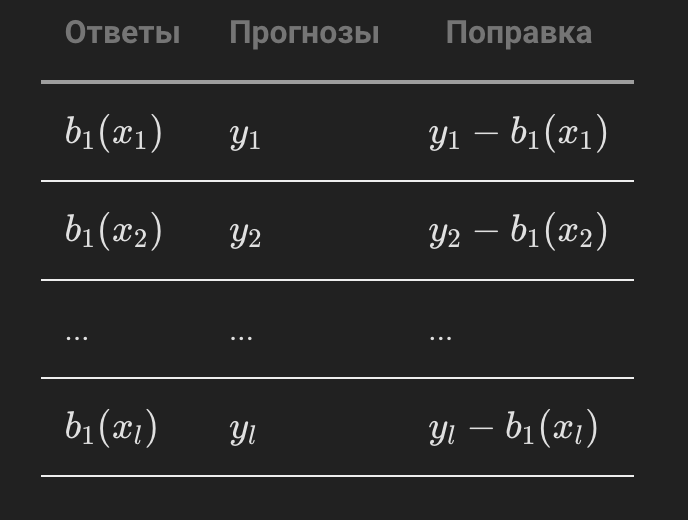



Тогда, если мы прибавим ответ нашего второго алгоритма к ответу первого алгоритма, то ответ $b_1 (x_i)$ сократится, и останется только $y_i$. То есть после прибавления $b_2$ к $b_1$ мы получим на объектах обучающей выборки нулевую ошибку, получим идеальные ответы.

Давайте тогда обучать $b_2$ так, чтобы его прогнозы были как можно ближе вот к этому вектору сдвигов, этому вектору ошибок. Получаем задачу, где минимизируется среднеквадратичное отклонение $b (x_i)$ от вот этих самых ошибок $y_i − b_1 (x_i)$.

$$b_{2}(x)=\underset{b}{\operatorname{argmin}} \frac{1}{\ell} \sum_{i=1}^{\ell}\left(b\left(x_{i}\right)-\left(y_{i}-b_{1}\left(x_{i}\right)\right)\right)^{2}$$

Если удастся решить задачу точно, то есть получить нулевую ошибку, то и наша композиция после добавления этого алгоритма b2 будет иметь нулевую ошибку. Но поскольку у нас алгоритмы базовые очень простые, скорее всего, точно решить задачу не получится, и поэтому b2 будет просто чуть-чуть улучшать качество первого базового алгоритма. 

Этот процесс можно продолжать очень долго. $n$-ный базовый алгоритм мы будем настраивать на ошибку композиции из $(n − 1)$ алгоритма. Мы будем продолжать этот процесс до тех пор, пока ошибка на обучающей выборке не будет нас устраивать.

## Алгоритм работы градиентного бустинга
Будем строить композиции вот такого вида:

$$a_N(x) = \sum_{n=1}^N b_n(x)$$

Саму композицию из $N$ алгоритмов будем обозначать как $a_N(x)$ и она будет представлять собой сумму $N$ базовых алгоритмов $b_n (x)$. Обратите внимание, что мы не усредняем, а просто складываем базовые алгоритмы поскольку каждый следующий корректирует ошибки предыдущих.

Будем считать, что у нас есть некая функция потерь, которую мы хотим минимизировать. Функция потерь — это некая функция L, которая измеряет ошибку на одном объекте.

$$L(y, z)$$

Ее аргументами являются $y$, истинный ответ на этом объекте, и $z$, прогноз нашего алгоритма на этом объекте. 

Первым шагом в построении бустинга является инициализация композиции каким-то простым алгоритмом. Например
- $b_0(x) = 0$
- $b_0(x) = \frac{1}{l}\sum_{i=1}^ly_i$
- $b_{0}(x)=\underset{y \in \mathbb{Y}}{\operatorname{argmax}} \sum_{i=1}^{\ell}\left[y_{i}=y\right]$

Далее действуем по индукции. Допустим мы уже построили:
$$a_{N-1}(x)=\sum_{n=0}^{N-1} b_{n}(x)$$

Попробуем понять, как именно нужно выбрать следующий базовый алгоритм $b_N$

Задача выглядит так: 

$$\sum_{i=1}^{\ell} L\left(y_{i}, a_{N-1}\left(x_{i}\right)+b\left(x_{i}\right)\right) \rightarrow \min _{b}$$

Мы суммируем потери на всей обучающей выборке от уже построенной композиции $a(N – 1)$ и нового алгоритма $b (x)$. И будем пытаться выбрать алгоритм $b (x)$ так, чтобы как можно сильнее уменьшить ошибку композиции на обучающей выборке, то есть, чтобы как можно сильнее уменьшить функционал. 

Для начала упростим себе задачу и попробуем ответить на более простой вопрос, а именно: какие значения наш новый базовый алгоритм должен принимать на объектах обучающей выборки, чтобы как можно сильнее уменьшить ошибку на обучающей выборке? Задача будет выглядеть вот так.

$$\sum_{i=1}^{\ell} L\left(y_{i}, a_{N-1}\left(x_{i}\right)+s_{i}\right) \rightarrow \min _{s_{1}, \ldots, s_{\ell}}$$

Мы суммируем функцию потерь по всем объектам из обучения и подставляем в нее следующий прогноз. Прогноз уже построенной композиции $N – 1$, и некоторый сдвиг этого прогноза на i-ом объекте, который мы будет обозначать, как $s_i$, и нужно найти такие значения $s_i$, чтобы они как можно сильнее уменьшили значение ошибки.

Мы получаем следующую задачу оптимизации:
$$F(s)=\sum_{i=1}^{\ell} L\left(y_{i}, a_{N-1}\left(x_{i}\right)+s_{i}\right) \rightarrow \min _{s}$$
$s = (s_1, ..., s_l)$ - вектор сдвигов

Нам нужно найти такой вектор сдвигов s, который будет минимизировать данную функцию $F (s)$. Вектор, который как можно сильнее уменьшает функцию — это антиградиент, поскольку он направлен в сторону наискорейшего убывания функции. Значит, вектор $s$ должен быть просто равен антиградиенту функции $F$, а именно он будет выглядеть вот так.

$$s=-\nabla F=(-L_{z}^{\prime}\left(y_{1}, a_{N-1}\left(x_{1}\right)\right), \ldots , -L_{z}^{\prime}\left(y_{l}, a_{N-1}\left(x_{l}\right)\right))$$

У него будет компонент столько, сколько объектов у нас на обучающей выборке и, например, первая компонента, это будет частная производная функции потерь $L$ по второму аргументу, по прогнозу, и вычислять мы ее будем в точке, которая равна прогнозу уже построенной композиции на объекте $x_1$, и все это берется с минусом.

Итак, мы поняли, как именно нужно сдвинуть прогнозы уже построенной композиции, чтобы достаточно хорошо уменьшить значение функции потерь на обучающей выборке. Иными словами, мы знаем какие значения новый алгоритм должен принимать на объектах обучающей выборки, и по этим значениям, в конечном числе точек, мы должны построить функцию $b (x)$, которая будет выдавать прогноз на любой точке из нашего пространства объектов.

$$b_{N}(x)=\underset{b}{\operatorname{argmin}} \frac{1}{\ell} \sum_{i=1}^{\ell}\left(b\left(x_{i}\right)-s_{i}\right)^{2}$$

- Вся информация о функции потерь L уже содержится в сдвигах $s_i$
- Используем MSE независимо от исходной задачи

**Примечание**: градиентный бустинг является универсальным апроксиматором только с условием неограниченной глубины

### Подвидем итог
1. Строим начальный алгоритм $b_0(x)$
2. Для $n = 1,..., N$
   - Вычисляем сдвиги:
   $$s=(-L_{z}^{\prime}\left(y_{1}, a_{N-1}\left(x_{1}\right)\right), \ldots , -L_{z}^{\prime}\left(y_{l}, a_{N-1}\left(x_{l}\right)\right))$$
   - Обучаем новый базовый алгоритм:
   $$b_{N}(x)=\underset{b}{\operatorname{argmin}} \frac{1}{\ell} \sum_{i=1}^{\ell}\left(b\left(x_{i}\right)-s_{i}\right)^{2}$$
   - Добавляем алгоритм в композицию:
   $$a_n(x) = \sum_{m=1}^n b_m(x)$$
   
## Плюсы и минусы бустинга
**Плюсы**
- Можно легко интерпретировать (в отличии от нейросетевых методов). 
- Устойчивый метод, который легко ограничивает переобучение.
- Требует гораздо меньше памяти чем RF

**Минусы**
- чувствителен к выбросам, поскольку каждый классификатор обязан исправлять ошибки в предыдущих. Таким образом, метод слишком зависит от выбросов в данных. 
- метод практически невозможно распараллелить. Это связано с тем, что каждый следующий эстиматор основывает свои корректировки на предыдущих предикторах, что затрудняет оптимизацию процедуры.


Обычно для градиентного бустинга используют следующие библиотеки:

- XGBoost
- CatBoost
- LightGBM

В классе мы будем использовать реализацию в sklearn, а в домашней работе предлагаю использовать XGBoost или любую другую реализацию из этих трех.

## Задача

Обучить модель градиентного бустинга на датасете, провести подбор гиперпараметров (взять любые 3 штуки, их список можно получить через документацию к модели).

Сравнить качество с полученными ранее результатами.

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# ваш код

## Стекинг

В случае, когда разные модели совершают разные ошибки, можно использовать стекинг.

In [52]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
estimators = [
    ('LogReg', LogisticRegression()),
    ('Tree', DecisionTreeClassifier())
]
clf=StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

### Задача
Добавить в стекинг еще несколько классификаторов (можно взять классификаторы из прошлых заданий) и получить финальный результат.

In [ ]:
# ваш код

# Домашняя работа

Будем работать с датасетом подержанных машин https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes.

Задача - построить прогноз цены машины по ее данным (год выпуска, пробег, расход, размер двигателя, тип коробки передач и тд). 

Это задача регрессии, поэтому нужно использовать модели регрессоры, а не классификаторы (например, не `StackingClassifier`, а `StackingRegressor`).

## Easy

Взять один файл с маркой машины.

Построить прогноз, используя модели линейной регрессии и случайного леса. Сравнить результаты, используя кросс-валидацию. Подобрать гиперпараметры моделей (для линейной регрессии можно использовать реализацию с градиентным спуском `SGDRegressor`). Оценить качество, используя метрику `r2_score`. Оценить важность признаков (параметр `feature_importance_` у случайного леса).

## Normal

Объединить в один датафрейм данные по всем маркам машин. Преобразовать категориальные признаки.

Построить еще несколько моделей, используя подбор гиперпараметров. Сравнить между собой все построенные модели.

## Hard

Построить модель стекинга над всеми моделями из задачи Normal + добавить один из градиентных бустингов XGBoost/LightGBM/CatBoost, если они не использовались. Удалось ли улучшить результат?

## Hard+

Иногда нужно использовать модели, у которых интерфейс отличается от интерфейса моделей из sklearn и тогда приходится самостоятельно реализовывать стекинг.

Задача 

Алгоритм построения стекинга:
- Получить прогнозы базовых моделей
- Использовать прогнозы базовых моделей в качестве признаков для финализирующей модели
- Оформить модель в отдельную функцию